```
# This is formatted as code
```
<h1>Implementation of Internet of Things in Developing Hybrid Energy Harvesting System </h1>
<h3><p>ADRIAN I. DELA CRUZ </p>
<p>JAMES FREDERIC B. DULO </p>
<p>GELAN M. NICOLAN </p>
<p>ARVENELL ABAD </p>





In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [2]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split
#Linear Regression Algorithm from sklearn
from sklearn import linear_model
#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Standard Scaler for Standardization
from sklearn.preprocessing import StandardScaler
#warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
df = pd.read_csv("Hybrid Panel testing.csv", index_col=0)
#Display the dataset
df

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nVoltage\n(V),Average Solar\nCurrent (A),Average Solar\nPower\n(W),Average Piezo\nVoltage\n(V),Average Piezo\nCurrent \n(A),Average Piezo\nPower\n(W)
Hours,,,,,,,,
7:00 AM,30.01,74.19,0.89,0.356,0.31684,0.390,0.1560,6.084000e-02
8:00 AM,29.82,75.13,0.90,0.360,0.32400,0.410,0.1640,6.724000e-02
9:00 AM,30.91,75.19,0.94,0.376,0.35344,0.400,0.1600,6.400000e-02
10:00 AM,29.99,75.59,0.95,0.380,0.36100,0.380,0.1520,5.776000e-02
11:00 AM,28.92,74.21,0.90,0.360,0.32400,0.400,0.1600,6.400000e-02
...,...,...,...,...,...,...,...,...
2:00 PM,33.90,54.70,4.09,1.636,6.69124,0.001,0.0004,4.000000e-07
3:00 PM,33.89,53.59,3.37,1.348,4.54276,0.001,0.0004,4.000000e-07
4:00 PM,32.67,58.03,1.93,0.772,1.48996,0.001,0.0004,4.000000e-07


In [4]:
#Preprocessing
df = df.drop(['Average Solar\nVoltage\n(V)','Average Solar\nCurrent (A)','Average Piezo\nVoltage\n(V)','Average Piezo\nCurrent \n(A)'], axis=1)

In [5]:
df.describe()

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W),Average Piezo\nPower\n(W)
count,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,30.678611,63.732778,1.009474,2.179693e-02
std,2.512029,8.638364,1.374527,3.172288e-02
min,25.250000,40.900000,0.000960,4.000000e-07
25%,29.017500,58.122500,0.324000,4.000000e-07
50%,30.520000,60.600000,0.462500,4.000000e-07
75%,32.325000,74.035000,1.173670,5.853000e-02
max,35.100000,76.420000,6.691240,1.000000e-01


In [6]:
#check for null values
df.isnull().sum()

Average\nHeat Index\n(°C)    0
Average\nHumidity\n(%)       0
Average Solar\nPower\n(W)    0
Average Piezo\nPower\n(W)    0
dtype: int64

In [7]:
#Get the correlation of the attributes
corr = df.corr()
corr

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W),Average Piezo\nPower\n(W)
Average\nHeat Index\n(°C),1.000000,-0.264770,0.687092,-0.332442
Average\nHumidity\n(%),-0.264770,1.000000,-0.393007,0.871718
Average Solar\nPower\n(W),0.687092,-0.393007,1.000000,-0.389737
Average Piezo\nPower\n(W),-0.332442,0.871718,-0.389737,1.000000



<h2> Model for Solar Power Output prediction. </h2>




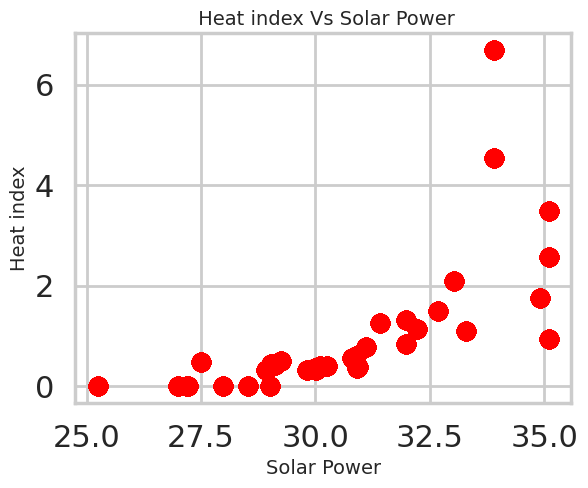

In [8]:
plt.scatter(df['Average\nHeat Index\n(°C)'], df['Average Solar\nPower\n(W)'], color='red')
plt.title(' Heat index Vs Solar Power', fontsize=14)
plt.xlabel('Solar Power', fontsize=14)
plt.ylabel('Heat index', fontsize=14)
plt.grid(True)
plt.show()

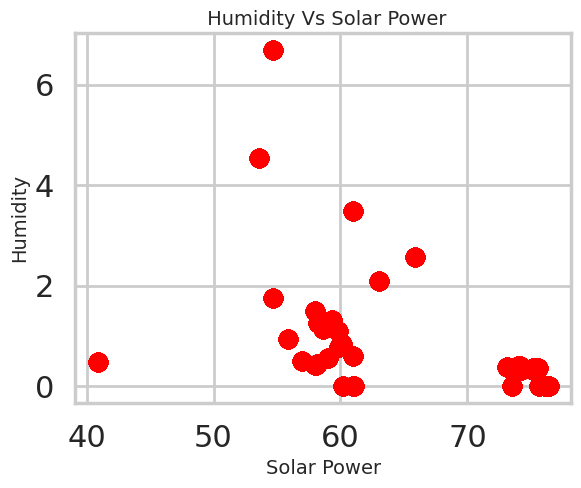

In [9]:
plt.scatter(df['Average\nHumidity\n(%)'], df['Average Solar\nPower\n(W)'], color='red')
plt.title(' Humidity Vs Solar Power', fontsize=14)
plt.xlabel('Solar Power', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

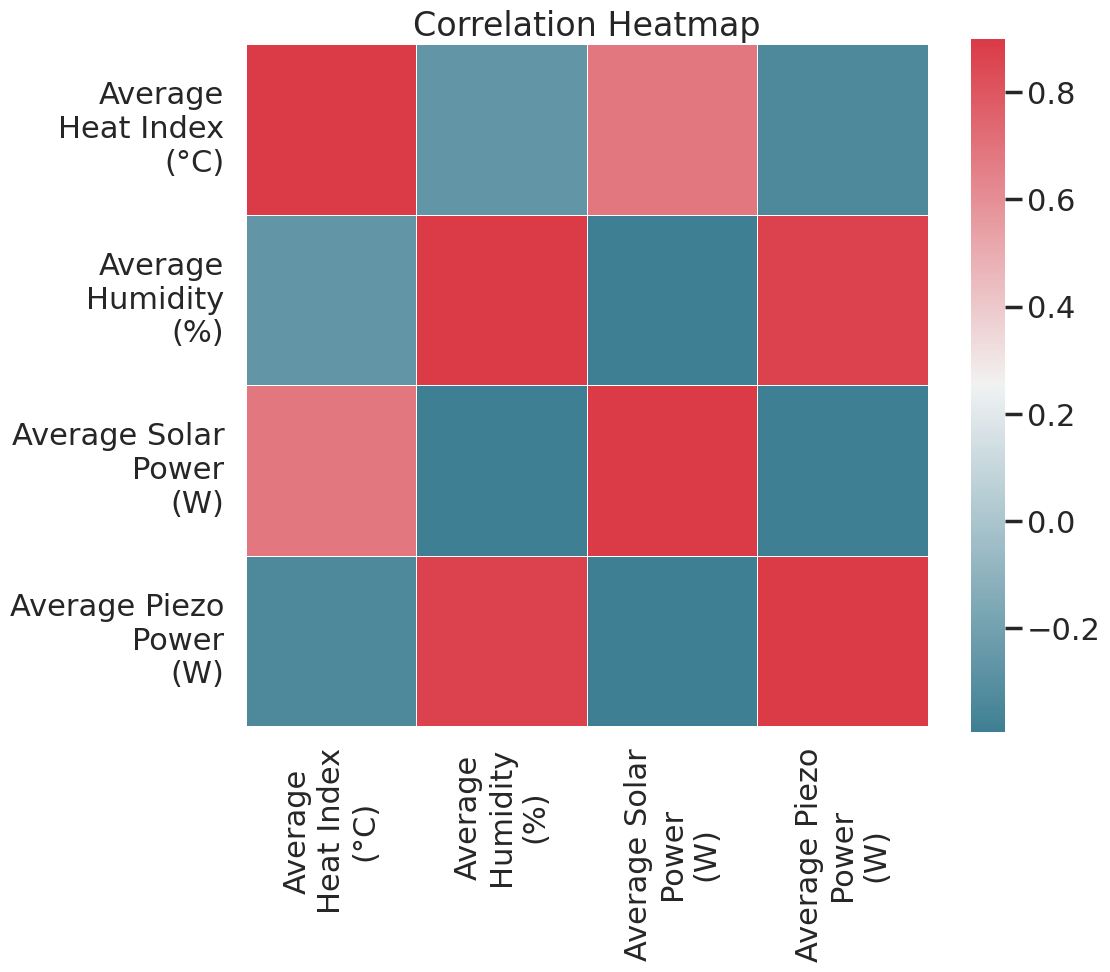

In [10]:
#Visualize Correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)
#add title
ax.set_title("Correlation Heatmap")

In [11]:
#Split the dataset to training and testing set
#Lets consider TV and radio to determine the advertising sales
df_train, df_test = train_test_split(df, test_size=0.25, random_state=35)

x_train = df_train[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_train = df_train['Average Solar\nPower\n(W)']

x_test = df_test[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_test = df_test['Average Solar\nPower\n(W)']

In [12]:
#Instantiate the Scaler
scaler = StandardScaler()
#Fit to the TRAIN set
scaler.fit(x_train)
#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)
#Apply to the TEST set
x_test_s = scaler.transform(x_test)

In [13]:
x_train_s
df.head()

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W),Average Piezo\nPower\n(W)
Hours,,,,
7:00 AM,30.01,74.19,0.31684,0.06084
8:00 AM,29.82,75.13,0.32400,0.06724
9:00 AM,30.91,75.19,0.35344,0.06400
10:00 AM,29.99,75.59,0.36100,0.05776
11:00 AM,28.92,74.21,0.32400,0.06400


In [14]:
#Instantiate the Linear Regression Algorithm
linreg = linear_model.LinearRegression()
#Train the Model
linreg.fit(x_train_s, y_train)

LinearRegression()

In [15]:
#Verifying Coefficient
pd.DataFrame(linreg.coef_, index=x_train.columns, columns=['Coef'])

,Coef
Average\nHeat Index\n(°C),0.866582
Average\nHumidity\n(%),-0.312027


In [16]:
# Validate the Model
# Predict the values
y_pred = linreg.predict(x_test_s)
y_pred

array([ 2.44671435,  0.39983188,  0.30039363,  0.75576707,  1.72237941,
        1.2215748 ,  2.05006729,  0.686246  ,  2.81198315, -0.16221547,
        0.67168754,  2.05006729,  2.62569606,  0.39983188,  1.2215748 ,
        0.64686751,  0.39983188,  2.44671435,  1.2215748 , -0.16221547,
        0.7575776 ,  0.44067144,  0.75576707,  0.64686751,  1.29528653,
       -0.64103544,  0.30039363,  2.78692069,  2.44463868,  1.2215748 ,
        1.29528653,  0.02561581,  0.64686751,  0.48498937, -0.16221547,
        0.08238815,  0.7575776 ,  0.64686751,  2.44671435,  1.72237941,
        0.64686751,  1.90154802, -0.37003071,  0.76804756,  0.67683617,
        0.75576707,  1.58987602, -0.64103544,  0.75576707, -0.75084067,
       -0.16221547,  2.05006729, -0.37003071,  0.75576707,  0.3418413 ,
        0.686246  , -0.12052536,  2.78692069,  0.7575776 ,  0.48498937,
        1.2215748 , -0.12052536,  2.05006729,  1.29528653,  1.8415361 ,
        0.76804756, -0.75084067,  2.62569606, -0.64103544,  0.08

In [17]:
#PERFORMANCE METRICS

In [18]:
df_results = pd.DataFrame(y_test)
df_results["Predicted Solar Power"] = y_pred
df_results

,Average Solar\nPower\n(W),Predicted Solar Power
Hours,,
12:00 PM,2.580640,2.446714
7:00 AM,0.316840,0.399832
8:00 AM,0.324000,0.300394
6:00 PM,0.484000,0.755767
12:00 PM,1.142440,1.722379
...,...,...
4:00 PM,0.003168,-0.162215
7:00 AM,0.316840,0.399832
12:00 PM,0.384160,0.757578


In [19]:
# Create a new dataframe containing the predictor variables, test results, and predicted results
results_df = pd.DataFrame({'Heat Index (°C)': x_test['Average\nHeat Index\n(°C)'],
                           'Humidity (%)': x_test['Average\nHumidity\n(%)'],
                           'Actual Solar Power (W)': y_test,
                           'Predicted Solar Power (W)': y_pred})
results_df

,Heat Index (°C),Humidity (%),Actual Solar Power (W),Predicted Solar Power (W)
Hours,,,,
12:00 PM,35.10,65.90,2.580640,2.446714
7:00 AM,30.01,74.19,0.316840,0.399832
8:00 AM,29.82,75.13,0.324000,0.300394
6:00 PM,27.50,40.90,0.484000,0.755767
12:00 PM,32.21,58.62,1.142440,1.722379
...,...,...,...,...
4:00 PM,28.52,75.60,0.003168,-0.162215
7:00 AM,30.01,74.19,0.316840,0.399832
12:00 PM,30.94,73.12,0.384160,0.757578


In [20]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

r2: 54.65
mae: 0.53
mse: 0.80
rmse: 0.89


In [21]:
x_test.columns

Index(['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)'], dtype='object')

In [22]:
#x_test.rename(columns={'Average\nHeat Index\n(°C)': 'Averageheatindex', 'Average\nHumidity\n(%)': 'Averagehumidity'})


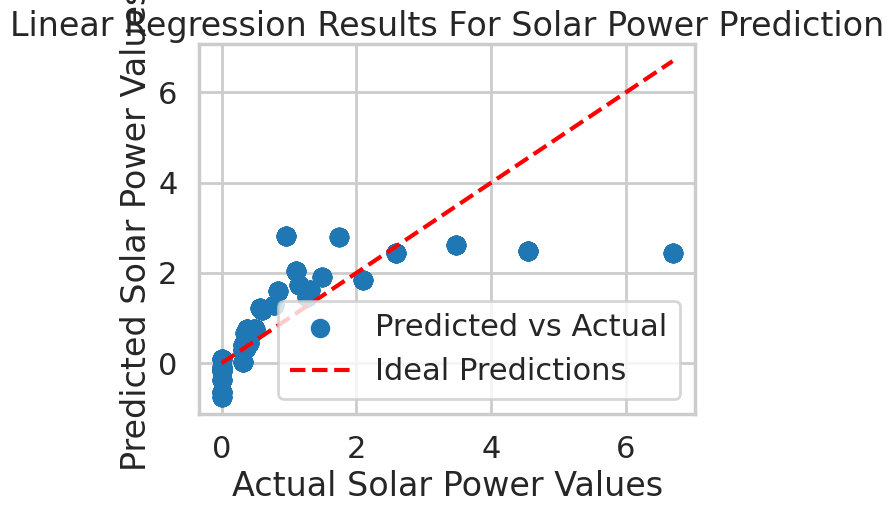

In [23]:
#visualizing results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Predictions')
plt.xlabel('Actual Solar Power Values')
plt.ylabel('Predicted Solar Power Values')
plt.title('Linear Regression Results For Solar Power Prediction')
plt.legend(loc='lower right')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

<h2> Model for Piezo Power Output Prediction </h2>


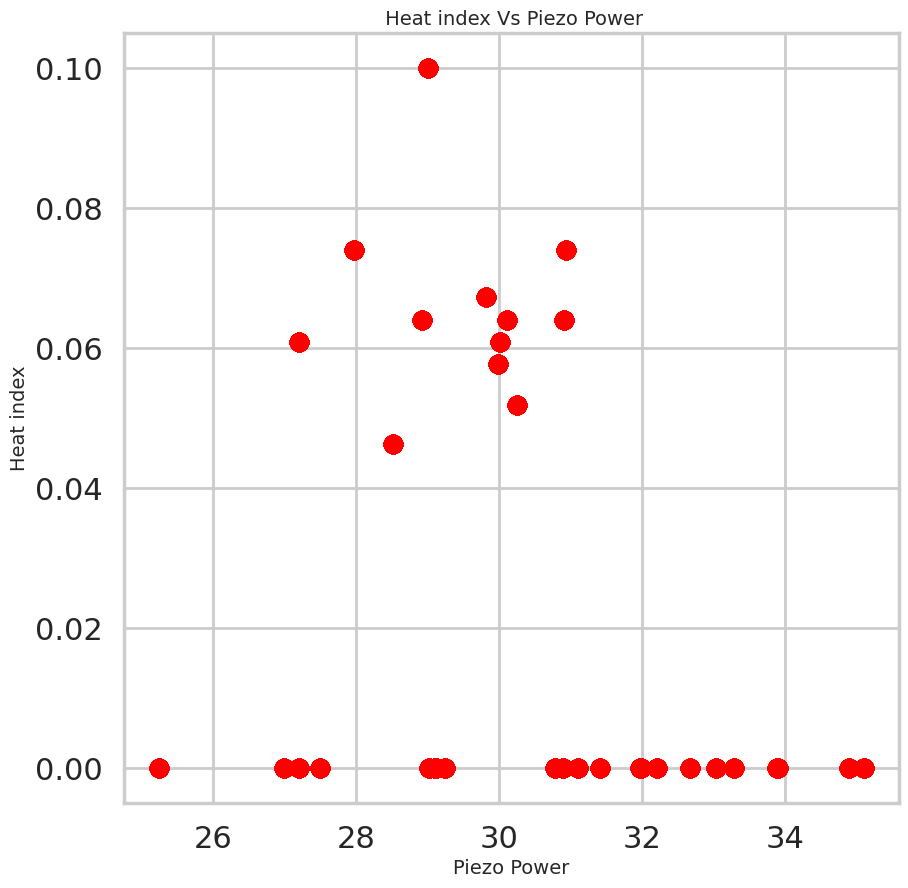

In [24]:
plt.scatter(df['Average\nHeat Index\n(°C)'], df['Average Piezo\nPower\n(W)'], color='red')
plt.title(' Heat index Vs Piezo Power', fontsize=14)
plt.xlabel('Piezo Power', fontsize=14)
plt.ylabel('Heat index', fontsize=14)
plt.grid(True)
plt.show()

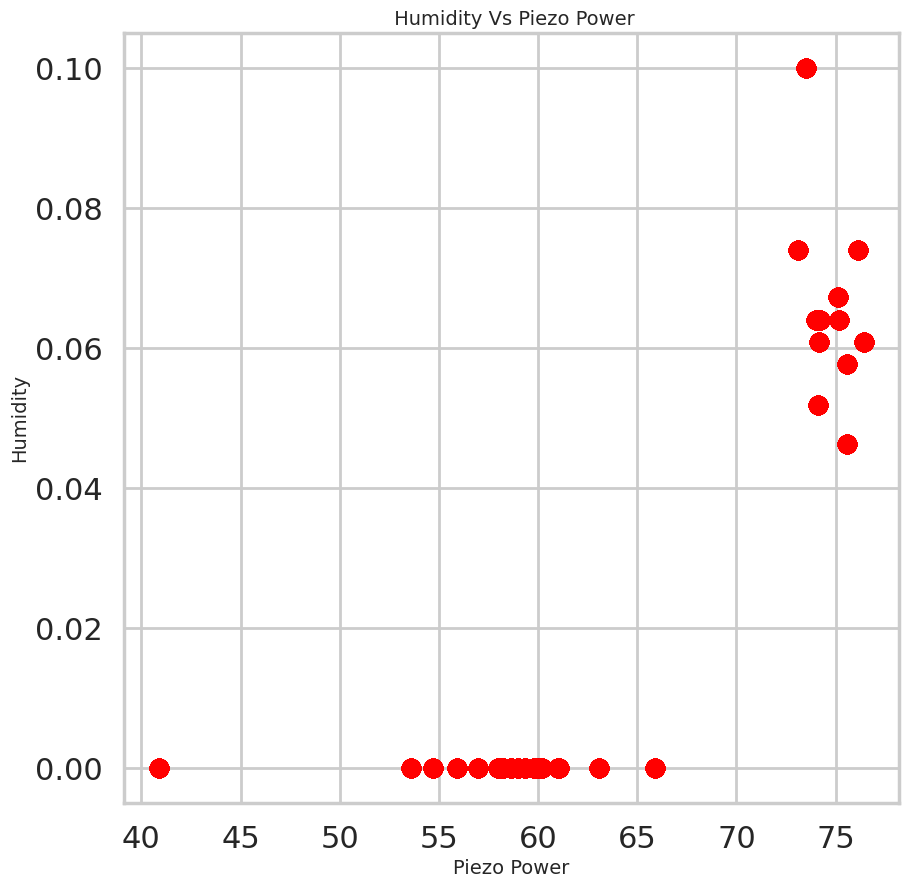

In [25]:
plt.scatter(df['Average\nHumidity\n(%)'], df['Average Piezo\nPower\n(W)'], color='red')
plt.title(' Humidity Vs Piezo Power', fontsize=14)
plt.xlabel('Piezo Power', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
plt.show()

In [26]:
#Split the dataset to training and testing set
#Lets consider TV and radio to determine the advertising sales
df_train2, df_test2 = train_test_split(df, test_size=0.25, random_state=35)

x_train2 = df_train2[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_train2 = df_train2['Average Piezo\nPower\n(W)']

x_test2 = df_test2[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_test2 = df_test2['Average Piezo\nPower\n(W)']

In [27]:
#Instantiate the Scaler
scaler2 = StandardScaler()
#Fit to the TRAIN set
scaler2.fit(x_train)
#Apply to the TRAIN set
x_train_s2 = scaler2.transform(x_train)
#Apply to the TEST set
x_test_s2 = scaler2.transform(x_test)

In [28]:
x_train_s2
df.head()

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W),Average Piezo\nPower\n(W)
Hours,,,,
7:00 AM,30.01,74.19,0.31684,0.06084
8:00 AM,29.82,75.13,0.32400,0.06724
9:00 AM,30.91,75.19,0.35344,0.06400
10:00 AM,29.99,75.59,0.36100,0.05776
11:00 AM,28.92,74.21,0.32400,0.06400


In [29]:
#Instantiate the Linear Regression Algorithm
linreg2 = linear_model.LinearRegression()
#Train the Model
linreg2.fit(x_train_s2, y_train2)

LinearRegression()

In [30]:
#Verifying Coefficient
pd.DataFrame(linreg2.coef_, index=x_train2.columns, columns=['Coef'])

,Coef
Average\nHeat Index\n(°C),-0.003155
Average\nHumidity\n(%),0.026365


In [31]:
# Validate the Model
# Predict the values
y_pred2 = linreg2.predict(x_test_s2)
y_pred2

array([ 0.02260383,  0.05453962,  0.05767782, -0.04507383,  0.00374052,
        0.00671569,  0.00597337,  0.00568184, -0.00825971,  0.06075019,
        0.0565032 ,  0.00597337,  0.0074807 ,  0.05453962,  0.00671569,
        0.00623868,  0.05453962,  0.02260383,  0.00671569,  0.06075019,
        0.05007702,  0.05385932, -0.04507383,  0.00623868,  0.00907581,
        0.06491526,  0.05767782, -0.01168297, -0.0104663 ,  0.00671569,
        0.00907581,  0.05596115,  0.00623868,  0.05399331,  0.06075019,
        0.05365756,  0.05007702,  0.00623868,  0.02260383,  0.00374052,
        0.00623868,  0.00134571,  0.0630721 ,  0.00237158,  0.00592284,
       -0.04507383,  0.0085644 ,  0.06491526, -0.04507383,  0.01989228,
        0.06075019,  0.00597337,  0.0630721 , -0.04507383,  0.05888547,
        0.00568184,  0.01511658, -0.01168297,  0.05007702,  0.05399331,
        0.00671569,  0.01511658,  0.00597337,  0.00907581,  0.0163901 ,
        0.00237158,  0.01989228,  0.0074807 ,  0.06491526,  0.05

In [32]:
df_results = pd.DataFrame(y_test2)
df_results["Predicted Solar Power"] = y_pred2
df_results

,Average Piezo\nPower\n(W),Predicted Solar Power
Hours,,
12:00 PM,4.000000e-07,0.022604
7:00 AM,6.084000e-02,0.054540
8:00 AM,6.724000e-02,0.057678
6:00 PM,4.000000e-07,-0.045074
12:00 PM,4.000000e-07,0.003741
...,...,...
4:00 PM,4.624000e-02,0.060750
7:00 AM,6.084000e-02,0.054540
12:00 PM,7.396000e-02,0.050077


In [33]:
# Create a new dataframe containing the predictor variables, test results, and predicted results
results_df2 = pd.DataFrame({'Heat Index (°C)': x_test2['Average\nHeat Index\n(°C)'],
                           'Humidity (%)': x_test2['Average\nHumidity\n(%)'],
                           'Actual Piezo Power (W)': y_test2,
                           'Predicted Piezo Power (W)': y_pred2})
results_df2

,Heat Index (°C),Humidity (%),Actual Piezo Power (W),Predicted Piezo Power (W)
Hours,,,,
12:00 PM,35.10,65.90,4.000000e-07,0.022604
7:00 AM,30.01,74.19,6.084000e-02,0.054540
8:00 AM,29.82,75.13,6.724000e-02,0.057678
6:00 PM,27.50,40.90,4.000000e-07,-0.045074
12:00 PM,32.21,58.62,4.000000e-07,0.003741
...,...,...,...,...
4:00 PM,28.52,75.60,4.624000e-02,0.060750
7:00 AM,30.01,74.19,6.084000e-02,0.054540
12:00 PM,30.94,73.12,7.396000e-02,0.050077


In [34]:
#Measure the performance of the model
r22 = r2_score(y_test2, y_pred2) * 100
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2) 
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))

print(("r2: %.2f") %r22)
print(("mae: %.2f") %mae2)
print(("mse: %.2f") %mse2)
print(("rmse: %.2f") %rmse2)

r2: 76.36
mae: 0.01
mse: 0.00
rmse: 0.02


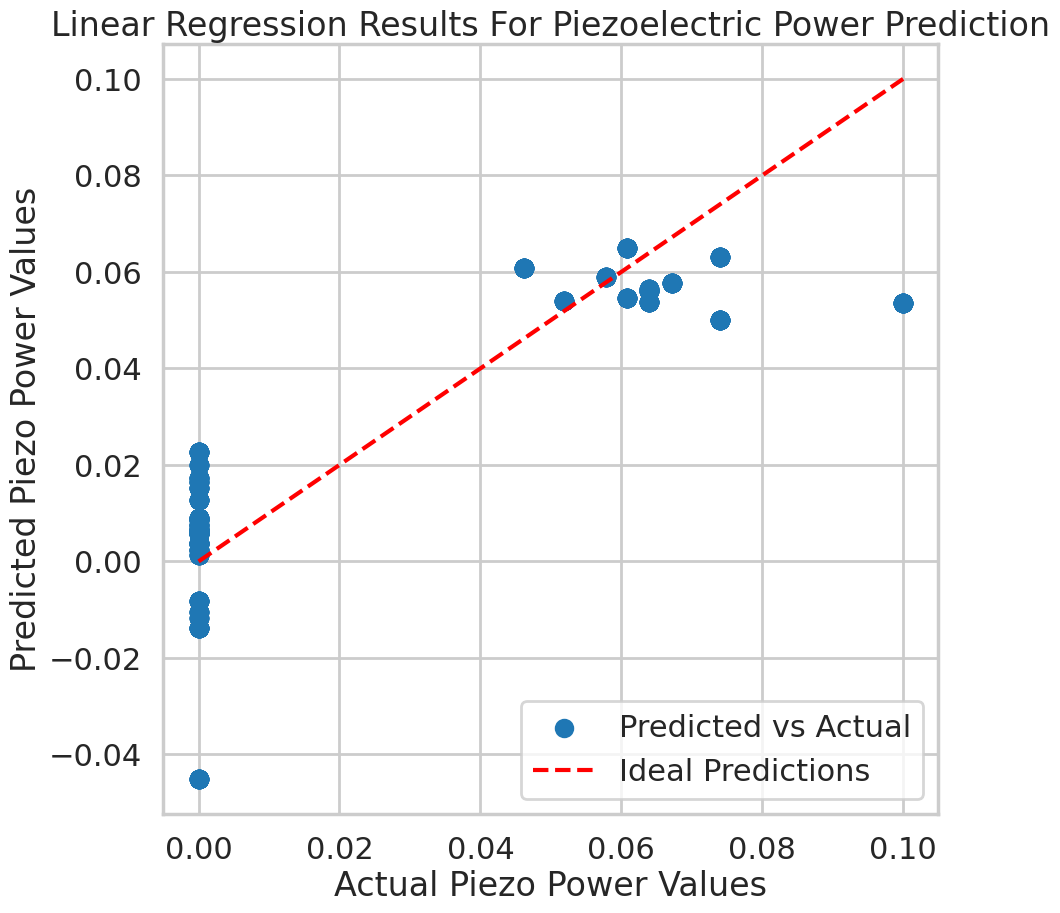

In [35]:
#visualizing results
plt.scatter(y_test2, y_pred2, label='Predicted vs Actual')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--', label='Ideal Predictions')
plt.xlabel('Actual Piezo Power Values')
plt.ylabel('Predicted Piezo Power Values')
plt.title('Linear Regression Results For Piezoelectric Power Prediction')
plt.legend(loc='lower right')
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

<h2> Prediction </h2>

In [36]:
# temperature = float(input('Enter temperature: '))
# humidity = float(input('Enter humidity: '))

# input_data = scaler.transform([[temperature, humidity]])
# predicted_power = linreg.predict(input_data)[0]
# predicted_power2 = linreg2.predict(input_data)[0]

# print('Predicted solar power:', predicted_power)
# print('Predicted Piezo power:', predicted_power2)

In [37]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 M

In [38]:
# import gradio as gr

# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")

# def predict_power(temperature, humidity):
#     input_data = scaler.transform([[temperature, humidity]])
#     predicted_power = linreg.predict(input_data)[0]
#     predicted_power2 = linreg2.predict(input_data)[0]
#     return f'Predicted solar power: {predicted_power:.2f}\nPredicted Piezo power: {predicted_power2:.2f}'

# iface = gr.Interface(predict_power, [temperature, humidity], "text")
# iface.launch()

In [39]:
# import gradio as gr

# # Define input components
# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")

# # Define prediction function
# def predict_power(temperature, humidity):
#     input_data = scaler.transform([[temperature, humidity]])
#     predicted_power = linreg.predict(input_data)[0]
#     predicted_power2 = linreg2.predict(input_data)[0]
#     return f'Predicted solar power: {predicted_power:.2f}\nPredicted Piezo power: {predicted_power2:.2f}'

# # Define header and paragraph components
# header = "Solar and Piezo Power Predictor"
# paragraph = "This app predicts the solar and piezo power output based on the input temperature and humidity."

# # Create interface
# iface = gr.Interface(
#     predict_power, 
#     [temperature, humidity], 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
# )

# # Launch interface
# iface.launch()

In [40]:
# import gradio as gr

# # Define input components
# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")
# needed_power = gr.inputs.Number(label="Needed Power Output (in Watts)")

# # Define prediction function
# def predict_power(temperature, humidity, needed_power):
#     # Predict solar power
#     input_data = scaler.transform([[temperature, humidity]])
#     predicted_solar_power = linreg.predict(input_data)[0]
    
#     # Compute suggested solar panel dimensions
#     panel_length = round((needed_power / predicted_solar_power) ** 0.5, 2)
#     panel_width = round(panel_length * 1.6, 2)
    
#     # Predict piezo power
#     predicted_piezo_power = linreg2.predict(input_data)[0]
    
#     # Compute number of piezo electric transducers needed
#     num_piezo = round(needed_power / predicted_piezo_power)
    
#     return f'Predicted solar power: {predicted_solar_power:.2f}\nSuggested solar panel dimensions: {panel_length} x {panel_width}\nPredicted Piezo power: {predicted_piezo_power:.2f}\nNumber of piezo electric transducers needed: {num_piezo}'

# # Define header and paragraph components
# header = "Warriors Solar and Piezo Power Predictor App"
# paragraph = "Created by warriors group which are CpE students of Jose Rizal University. This app predicts the solar and piezo power output based on the input temperature and humidity. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs)."

# # Create interface
# iface = gr.Interface(
#     predict_power, 
#     [temperature, humidity, needed_power], 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
#     output_flag=None,
#     examples=[
#         ["65", "50", "5"],
#         ["30", "60", "8"],
#         ["35", "70", "12"]
#     ]
# )

# # Launch interface
# iface.launch()


In [41]:
# import gradio as gr

# # Define input components
# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")
# power = gr.inputs.Number(label="Needed Power Output (in Watts)")

# # Define prediction function
# def predict_power(temperature, humidity, power):
#     # Compute the area of the solar panel needed to generate the required power output
#     solar_panel_area = (power / 2) * 1.25
    
#     # Compute the number of piezoelectric transducers needed to generate the required power output
#     piezo_count = round(power / 0.1)
    
#     # Output the results
#     return f'For a needed power output of {power} watts:\n\n- Solar panel area needed: {solar_panel_area:.2f} sq. cm\n- Number of piezoelectric transducers needed: {piezo_count} pcs.'

# # Define header and paragraph components
# header = "Warriors Solar and Piezo Power Predictor App"
# paragraph = "Created by warriors group which are CpE students of Jose Rizal University. This app computes the area of the solar panel and the number of piezoelectric transducers needed to generate a specific power output based on the input temperature and humidity. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs)."

# # Create interface
# iface = gr.Interface(
#     predict_power, 
#     [temperature, humidity, power], 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
#     examples=[
#         ["65", "50", "1"],
#         ["30", "60", "3"],
#         ["35", "70", "5"]
#     ]
# )

# # Launch interface
# iface.launch()

In [42]:
# import gradio as gr

# # Define input components
# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")
# power = gr.inputs.Number(label="Needed Power Output (in Watts)")

# # Define prediction function
# def predict_power(temperature, humidity, power):
#     # Compute the length and width of the solar panel needed to generate the required power output
#     solar_panel_length = round((power / 2) / (5 * 2 / 100)) # Assume 5 watts per panel
#     solar_panel_width = round(solar_panel_length * 142 / 88) # Assume aspect ratio of 88:142
    
#     # Compute the number of piezoelectric transducers needed to generate the required power output
#     piezo_count = round(power / 0.1)
    
#     # Output the results
#     return f'For a needed power output of {power} watts:\n\n- Solar panel length needed: {solar_panel_length} cm\n- Solar panel width needed: {solar_panel_width} cm\n- Number of piezoelectric transducers needed: {piezo_count} pcs.'

# # Define header and paragraph components
# header = "Warriors Solar and Piezo Power Predictor App"
# paragraph = "Created by warriors group which are CpE students of Jose Rizal University. This app computes the length and width of the solar panel and the number of piezoelectric transducers needed to generate a specific power output based on the input temperature and humidity. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs)."

# # Create interface
# iface = gr.Interface(
#     predict_power, 
#     [temperature, humidity, power], 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
#     examples=[
#         ["65", "50", "1"],
#         ["30", "60", "3"],
#         ["35", "70", "5"]
#     ]
# )

# # Launch interface
# iface.launch()


In [43]:
# import math

# def compute_panel_size_and_piezos(power_output):
#     # Compute the solar panel size
#     panel_width = 88
#     panel_length = 142
#     panel_area = panel_width * panel_length
#     required_area = power_output / 2
#     scaling_factor = math.sqrt(required_area / panel_area)
#     panel_width *= scaling_factor
#     panel_length *= scaling_factor

#     # Compute the number of piezoelectric transducers needed
#     piezo_power = 0.5 / 12 # Each piezo can produce 0.5W / 12 = 0.0416666... W
#     piezo_count = math.ceil(power_output / piezo_power)

#     return (panel_width, panel_length, piezo_count)


# import gradio as gr

# # Define input components
# power_output = gr.inputs.Number(label="Power Output (in Watts)")

# # Define prediction function
# def predict_panel_and_piezos(power_output):
#     panel_width, panel_length, piezo_count = compute_panel_size_and_piezos(power_output)
#     return f'Solar panel size: {panel_width:.2f} x {panel_length:.2f} mm\nNumber of piezoelectric transducers needed: {piezo_count}'

# # Define header and paragraph components
# header = "Solar Panel and Piezoelectric Transducer Calculator"
# paragraph = "Enter the required power output and the calculator will estimate the size of the solar panel and the number of piezoelectric transducers needed to produce that amount of power."

# # Create interface
# iface = gr.Interface(
#     predict_panel_and_piezos, 
#     power_output, 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
#     examples=[
#         ["1"],
#         ["2"],
#         ["3"],
#         ["4"]
#     ]
# )

# # Launch interface
# iface.launch()



In [44]:
# import gradio as gr
# from gradio.mix import Parallel
# from gradio.interface import Panel

# # Define input components
# temperature = gr.inputs.Number(label="Temperature")
# humidity = gr.inputs.Number(label="Humidity")
# power_output = gr.inputs.Number(label="Power Output Needed (in watts)")

# # Define prediction functions
# def predict_power(temperature, humidity):
#     input_data = scaler.transform([[temperature, humidity]])
#     predicted_power = linreg.predict(input_data)[0]
#     predicted_power2 = linreg2.predict(input_data)[0]
#     return f'Predicted solar power in watts: {predicted_power:.2f}\nPredicted Piezo power in watts: {predicted_power2:.2f}'

# def predict_dimensions(power_output):
#     if power_output < 0.5:
#         piezo_count = round(power_output / 0.0417)
#         return f'Solar panel dimension: 88mm x 142mm\nNumber of Piezoelectric Transducers: {piezo_count} pcs'
#     else:
#         dimensions = [88, 142]
#         piezo_count = 12
#         while (power_output > 2):
#             dimensions[0] *= 2
#             dimensions[1] *= 2
#             power_output /= 4
#             piezo_count *= 4
#         piezo_count += round(power_output / 0.5)
#         return f'Solar panel dimension: {dimensions[0]}mm x {dimensions[1]}mm\nNumber of Piezoelectric Transducers: {piezo_count} pcs'
        

# # Define header and paragraph components
# header = "Warriors Solar and Piezo Power Predictor App"
# paragraph = "Created by warriors group which are CpE students of Jose Rizal University.This app predicts the solar and piezo power output based on the input temperature and humidity. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs) "

# # Create interface
# input_panel = Panel(temperature, humidity, name="Solar and Piezo Power Predictor")
# output_panel = Panel(predict_power, predict_dimensions, power_output, name="Predicted Output")

# iface = gr.Interface(
#     [input_panel, power_output, output_panel],
#     Parallel("text", "text"),
#     title=header,
#     description=paragraph,
#     examples=[
#         [["65", "50"], "0.5"],
#         [["30", "60"], "1"],
#         [["35", "70"], "3"]
#     ]
# )

# # Launch interface
# iface.launch()


In [45]:
import gradio as gr

# Define input components
temperature = gr.inputs.Number(label="Temperature")
humidity = gr.inputs.Number(label="Humidity")

# Define prediction function
def predict_power(temperature, humidity):
    input_data = scaler.transform([[temperature, humidity]])
    predicted_power = linreg.predict(input_data)[0]
    predicted_power2 = linreg2.predict(input_data)[0]
    return f'Predicted solar power in watts: {predicted_power:.2f}\nPredicted Piezo power in watts: {predicted_power2:.2f}'

# Define header and paragraph components
header = "Warriors Solar and Piezo Power Predictor App"
paragraph = "Created by warriors group which are CpE students of Jose Rizal University.This app predicts the solar and piezo power output based on the input temperature and humidity. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs) "

# Create interface
iface = gr.Interface(
    predict_power, 
    [temperature, humidity], 
    "text",
    title=header,
    description=paragraph,
    layout="vertical",
    output_flag=None,
    examples=[
        ["65", "50"],
        ["30", "60"],
        ["35", "70"]
    ]
)

# Launch interface
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [46]:
# import gradio as gr

# # Define input component
# power_output = gr.inputs.Number(label="Power Output Needed (in watts)")

# # Define prediction function
# def predict_dimensions(power_output):
#     if power_output == 0:
#         piezo_count = 0
#         dimensions = [0, 0]
#     elif power_output < 0.5:
#         piezo_count = round(power_output / 0.0417)
#         dimensions = [88, 142]
#     else:
#         dimensions = [88, 142]
#         piezo_count = 12
#         while (power_output > 2):
#             dimensions[0] *= 2
#             dimensions[1] *= 2
#             power_output /= 4
#             piezo_count *= 4
#         piezo_count += round(power_output / 0.5)
#     return f'Solar panel dimension: {dimensions[0]}mm x {dimensions[1]}mm\nNumber of Piezoelectric Transducers: {piezo_count} pcs'
        

# # Define header and paragraph components
# header = "Warriors Solar and Piezo Power Predictor App"
# paragraph = "Created by warriors group which are CpE students of Jose Rizal University. This app predicts the solar panel dimension and the number of piezoelectric transducers needed to generate a specific power output based on the input power output needed. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs)."

# # Create interface
# iface = gr.Interface(
#     predict_dimensions, 
#     power_output, 
#     "text",
#     title=header,
#     description=paragraph,
#     layout="vertical",
#     examples=[
#         ["0.2"],
#         ["1"],
#         ["4"],
#         ["0"]
#     ]
# )

# # Launch interface
# iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [63]:
import gradio as gr

# Define input components
temperature = gr.inputs.Number(label="Temperature")
humidity = gr.inputs.Number(label="Humidity")
power_output = gr.inputs.Number(label="Power Output Needed (in watts)")

# Define prediction functions
def predict_power(temperature, humidity):
    input_data = scaler.transform([[temperature, humidity]])
    predicted_power = linreg.predict(input_data)[0]
    predicted_power2 = linreg2.predict(input_data)[0]
    return f'Predicted solar power in watts: {predicted_power:.2f}\nPredicted Piezo power in watts: {predicted_power2:.2f}'

def predict_dimensions(power_output):
    if power_output == 0:
        piezo_count = 0
        dimensions = [0, 0]
    elif power_output < 0.5:
        piezo_count = round(power_output / 0.0417)
        dimensions = [88, 142]
    else:
        dimensions = [88, 142]
        piezo_count = 12
        while (power_output > 2):
            dimensions[0] *= 2
            dimensions[1] *= 2
            power_output /= 4
            piezo_count *= 4
        piezo_count += round(power_output / 0.5)
    return f'Solar panel dimension: {dimensions[0]}mm x {dimensions[1]}mm\nNumber of Piezoelectric Transducers: {piezo_count} pcs'

# Define header and paragraph components
header = "Warriors Solar and Piezo Power Predictor App"
paragraph = "Created by warriors group which are CpE students of Jose Rizal University. This app predicts the solar and piezo power output, as well as the solar panel dimension and the number of piezoelectric transducers needed to generate a specific power output based on the input temperature, humidity and power output needed. Dependent and applicable for the prototype's specifications: Solar Panel (polycrystalline, 88*142mm, 5V, 2W) and Piezo Electric transducer (35mm, 12 pcs)."

# Define output components
output1 = gr.outputs.Textbox(label="Power Prediction")
output2 = gr.outputs.Textbox(label="Dimension and Piezo Count Prediction")

# Define prediction function that calls both prediction functions
def predict_all(temperature, humidity, power_output, model):
    if model == "Solar and Piezo Power Prediction":
        power_prediction = predict_power(temperature, humidity)
        return power_prediction, ""
    elif model == "Solar Panel Dimension and Piezo Count Prediction":
        dimension_prediction = predict_dimensions(power_output)
        return "", dimension_prediction
    elif model == "Both":
        power_prediction = predict_power(temperature, humidity)
        dimension_prediction = predict_dimensions(power_output)
        return power_prediction, dimension_prediction

# Create interface with tabs
iface = gr.Interface(
    predict_all,
    [temperature, humidity, power_output, gr.inputs.Dropdown(["Solar and Piezo Power Prediction", "Solar Panel Dimension and Piezo Count Prediction", "Both"], label="Model", default="Both")],
    [output1, output2],
    title=header,
    description=paragraph,
    layout="vertical",
    examples=[
        [65, 50, 1, "Both"],
        [0, 0, 0, "Solar Panel Dimension and Piezo Count Prediction"]
    ]
)

# Launch interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>